## D04用CNN做MNIST手寫辨識

In [1]:
%matplotlib inline
import numpy as np

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import Adadelta

Using Theano backend.


In [3]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()

In [4]:
#import keras.backend as K
#K.backend()

In [5]:
# Thena backend: (28, 28, 1)
# tensorflow backend: (1,28,28)
x_train = x0_train.reshape(60000, 28, 28, 1)
x_test = x0_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [6]:
y_test = np_utils.to_categorical(y0_test, 10)
y_train = np_utils.to_categorical(y0_train, 10)

## CNN

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(10, (3,3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Conv2D(10, (3,3), padding='same'))
model.add(Activation('relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [13]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
model.compile(loss="categorical_crossentropy", optimizer=Adadelta(), metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, batch_size=128, epochs=12)

Epoch 1/12
60000/60000 [==============================] - 28s - loss: 0.3877 - acc: 0.8830    
Epoch 2/12
60000/60000 [==============================] - 28s - loss: 0.1087 - acc: 0.9678    
Epoch 3/12
60000/60000 [==============================] - 27s - loss: 0.0809 - acc: 0.9759    
Epoch 4/12
60000/60000 [==============================] - 29s - loss: 0.0666 - acc: 0.9798    
Epoch 5/12
60000/60000 [==============================] - 28s - loss: 0.0574 - acc: 0.9827    
Epoch 6/12
60000/60000 [==============================] - 27s - loss: 0.0506 - acc: 0.9844    
Epoch 7/12
60000/60000 [==============================] - 27s - loss: 0.0444 - acc: 0.9864    
Epoch 8/12
60000/60000 [==============================] - 33s - loss: 0.0408 - acc: 0.9876    
Epoch 9/12
60000/60000 [==============================] - 28s - loss: 0.0371 - acc: 0.9886    
Epoch 10/12
60000/60000 [==============================] - 30s - loss: 0.0338 - acc: 0.9896    
Epoch 11/12
60000/60000 [========================

In [16]:
result = model.predict_classes(x_test)

 9856/10000 [============================>.] - ETA: 0s

In [17]:
score = model.evaluate(x_test, y_test)

 9760/10000 [============================>.] - ETA: 0s

In [18]:
loss, acc = score

In [19]:
loss

0.036187746262334987

In [20]:
acc

0.98780000000000001

## 看看結果

In [23]:
import matplotlib.pyplot as plt

In [24]:
pick = np.random.randint(1,9999, 25)

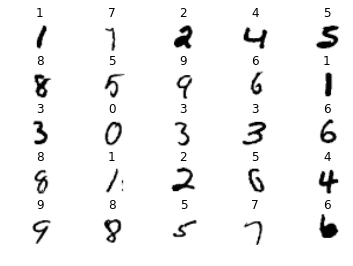

In [25]:
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x0_test[pick[i]], cmap='Greys')
    plt.title(result[pick[i]])
    plt.axis("off")